#  In this example , i will add malicious nodes to  substantially change the prediction graph of the ml model


In [4]:
from sklearn.datasets import make_classification
from sklearn.neural_network import  MLPClassifier
# creating a random dataset for a binary classifier
X , y = make_classification(n_samples=500 , n_features=2,n_informative=2,n_redundant=0,weights=[.5,.5],random_state=30)
## now creating the classifier for maintaining the required features
# and fitting half data for the traning and other half of testing
clf = MLPClassifier(max_iter = 1000 , random_state = 123).fit(X[:250],y[:250])


In [5]:
import numpy as np
# now creating a visualization of classifier decision function to analyse the working
# creating a random mesh grid
xx , yy = np.mgrid[-3:3:.01 , -3:3:.01]
grid = np.c_[xx.ravel() , yy.ravel()]
probs = clf.predict_proba(grid)[:,1].reshape(xx.shape)

[(-3, 3), (-3, 3), None]

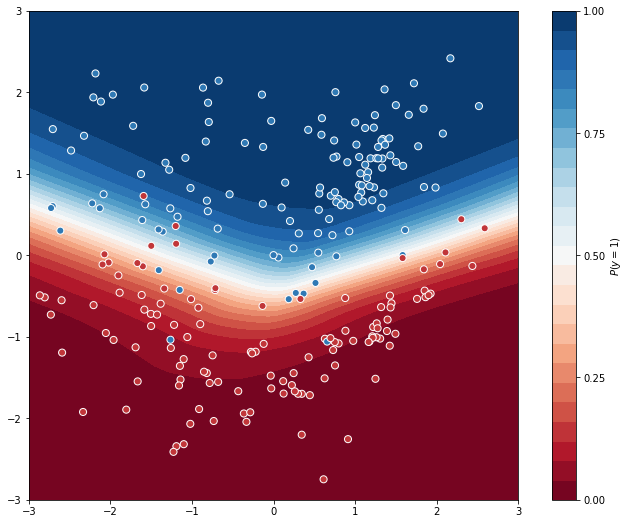

In [6]:
# now generating the countour plot

import matplotlib.pyplot as plt
f , ax = plt.subplots(figsize=(12, 9))
# Plot the contour background
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
# Plot the test set (latter half of X and y)
ax.scatter(X[250:,0], X[250:, 1], c=y[250:], s=50,
cmap="RdBu", vmin=-.2, vmax=1.2,
edgecolor="white", linewidth=1)
ax.set(aspect="equal",
xlim=(-3, 3), ylim=(-3, 3))

## now we try to do come malicious tricks by entering  the malicious nodes and then finding the effect.

In [10]:
# now defining a function to declare the decision function
def plot_decision_boundary(X_orig, y_orig, probs_orig, chaff_X=None, chaff_y=None, probs_poisoned=None):
    f , ax = plt.subplots(figsize=(12, 9))
    ax.scatter(X_orig[250:,0], X_orig[250:, 1], 
               c=y_orig[250:], s=50, cmap="gray",
               edgecolor="black", linewidth=1)
    
    # checking wether any list is generated corrected or not.
    if all([(chaff_X is not None),
            (chaff_y is not None),
            (probs_poisoned is not None)]):
        ax.scatter(chaff_X[:,0], chaff_X[:, 1], 
                   c=chaff_y, s=50, cmap="gray", 
                   marker="*", edgecolor="black", linewidth=1)
        ax.contour(xx, yy, probs_orig, levels=[.5], 
                   cmap="gray", vmin=0, vmax=.8)
        ax.contour(xx, yy, probs_poisoned, levels=[.5], 
                   cmap="gray")
    else:
        ax.contour(xx, yy, probs_orig, levels=[.5], cmap="gray")

    ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))

        

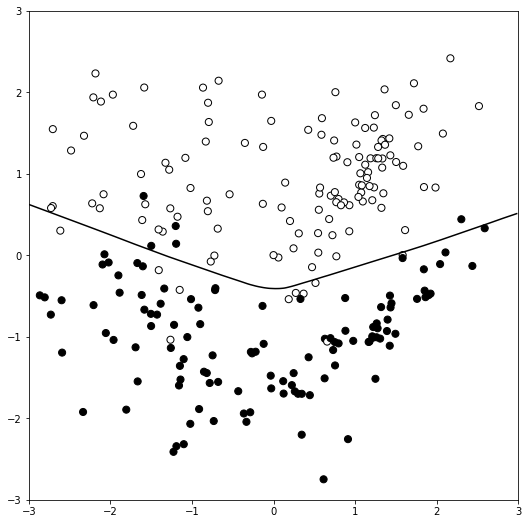

In [13]:
# adding selected chaff nodes ( called in scientific articles)
num_chaff = 100
chaff_X = np.array([np.linspace(-2, -1 , num_chaff),
np.linspace(0.1, 0.1, num_chaff)]).T
chaff_y = np.ones(num_chaff)
# finding normal plots
plot_decision_boundary(X, y, probs)


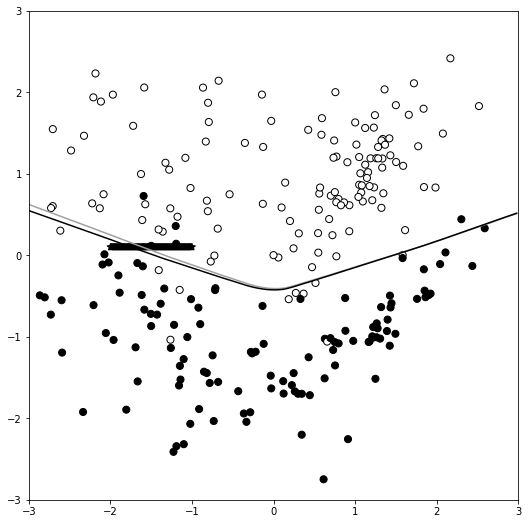

In [14]:
# now again traning the model with the info from the 
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)



In [ ]:
# now changing the number of malicious values and  then plotting the graph ,
# we can ascertain the effect of changing of decision boundary.
## the end ####


